In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Set paths

DATASET_DIR = r"C:\Users\HP\PROJECTS\DL Project - 1\Facemask_Detection\data"  
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20

In [4]:
# Data Augmentation and Loading

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Use 20% for validation
)

train_data = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [5]:
# Build the Model with MobileNetV2 base

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  

In [6]:
# Custom head

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [7]:
# Compile the model

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Callbacks

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)

In [9]:
# Train the model

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

C:\Users\HP\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
161/189 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7022 - loss: 0.6155

C:\Users\HP\anaconda\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7150 - loss: 0.5945

189/189 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.7154 - loss: 0.5938 - val_accuracy: 0.8987 - val_loss: 0.2865
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.9162 - loss: 0.2406

189/189 ━━━━━━━━━━━━━━━━━━━━ 175s 926ms/step - accuracy: 0.9162 - loss: 0.2404 - val_accuracy: 0.9470 - val_loss: 0.1781
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.9441 - loss: 0.1619

189/189 ━━━━━━━━━━━━━━━━━━━━ 177s 935ms/step - accuracy: 0.9441 - loss: 0.1618 - val_accuracy: 0.9576 - val_loss: 0.1340
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.9611 - loss: 0.1229

189/189 ━━━━━━━━━━━━━━━━━━━━ 176s 933ms/step - accuracy: 0.9611 - loss: 0.1228 - val_accuracy: 0.9662 - val_loss: 0.1076
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 182s 963ms/step - accuracy: 0.9679 - loss: 0.0998 - val_accuracy: 0.9662 - val_loss: 0.1060
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.9701 - loss: 0.0922

189/189 ━━━━━━━━━━━━━━━━━━━━ 174s 919ms/step - accuracy: 0.9701 - loss: 0.0922 - val_accuracy: 0.9702 - val_loss: 0.0835
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - accuracy: 0.9707 - loss: 0.0854

189/189 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9707 - loss: 0.0853 - val_accuracy: 0.9742 - val_loss: 0.0819
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 237s 966ms/step - accuracy: 0.9738 - loss: 0.0774 - val_accuracy: 0.9728 - val_loss: 0.0722
Epoch 9/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 175s 928ms/step - accuracy: 0.9738 - loss: 0.0752 - val_accuracy: 0.9735 - val_loss: 0.0802
Epoch 10/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.9758 - loss: 0.0691

189/189 ━━━━━━━━━━━━━━━━━━━━ 178s 939ms/step - accuracy: 0.9759 - loss: 0.0691 - val_accuracy: 0.9775 - val_loss: 0.0678
Epoch 11/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.9816 - loss: 0.0624

189/189 ━━━━━━━━━━━━━━━━━━━━ 176s 932ms/step - accuracy: 0.9816 - loss: 0.0624 - val_accuracy: 0.9808 - val_loss: 0.0641
Epoch 12/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 179s 945ms/step - accuracy: 0.9752 - loss: 0.0699 - val_accuracy: 0.9715 - val_loss: 0.0684
Epoch 13/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9839 - loss: 0.0507 - val_accuracy: 0.9801 - val_loss: 0.0664
Epoch 14/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.9801 - loss: 0.0555 - val_accuracy: 0.9775 - val_loss: 0.0626
Epoch 15/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9833 - loss: 0.0519 - val_accuracy: 0.9775 - val_loss: 0.0652
Epoch 16/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.9829 - loss: 0.0529 - val_accuracy: 0.9775 - val_loss: 0.0642
Epoch 17/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9805 - loss: 0.0551

189/189 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.9805 - loss: 0.0551 - val_accuracy: 0.9841 - val_loss: 0.0570
Epoch 18/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9778 - loss: 0.0590

189/189 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.9778 - loss: 0.0590 - val_accuracy: 0.9854 - val_loss: 0.0538
Epoch 19/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.9819 - loss: 0.0493 - val_accuracy: 0.9788 - val_loss: 0.0544
Epoch 20/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.9817 - loss: 0.0483 - val_accuracy: 0.9801 - val_loss: 0.0591


In [10]:
# Save final model

model.save("final_model.h5")

In [19]:
# Model Evaluation

import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load the trained model ===
model = load_model("best_model.h5")


In [20]:
# === Prepare the validation/test data again ===

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32
DATASET_DIR = r"C:\Users\HP\PROJECTS\DL Project - 1\Facemask_Detection\data"

# Define split
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Use the validation subset
val_data = test_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # Now this works
    shuffle=False
)


Found 1510 images belonging to 2 classes.


In [21]:
# === Get predictions ===

pred_probs = model.predict(val_data)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())


48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 940ms/step


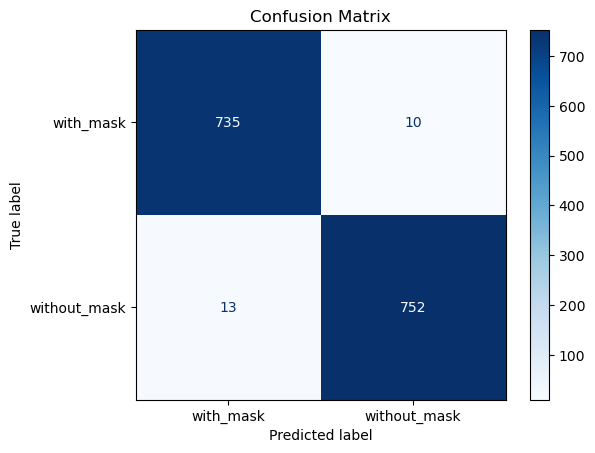

In [22]:
# === Confusion Matrix ===

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [23]:
# === Classification Report ===

report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.98       745
without_mask       0.99      0.98      0.98       765

    accuracy                           0.98      1510
   macro avg       0.98      0.98      0.98      1510
weighted avg       0.98      0.98      0.98      1510



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


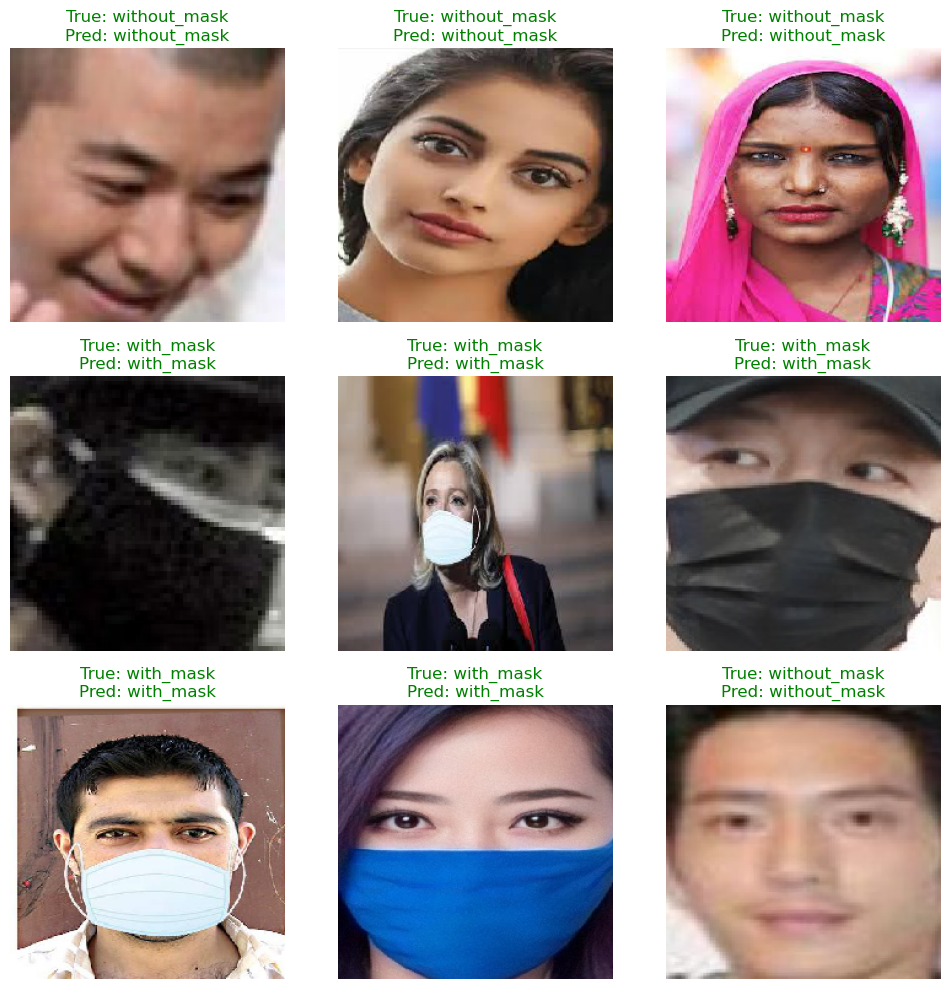

In [24]:
import random
import os
from tensorflow.keras.preprocessing import image

# Random samples
filenames = val_data.filenames
sample_indices = random.sample(range(len(filenames)), 9)

plt.figure(figsize=(10, 10))

for i, idx in enumerate(sample_indices):
    img_path = os.path.join(val_data.directory, filenames[idx])
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    pred = model.predict(np.expand_dims(img_array, axis=0))
    pred_label = class_labels[np.argmax(pred)]
    true_label = class_labels[y_true[idx]]

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {pred_label}", color='green' if true_label == pred_label else 'red')
    plt.axis("off")

plt.tight_layout()
plt.show()
